# Initialization
This section was already in the codebase & no changes were made. The "*import numpy as np*" imports NumPy library to use Arrays, Matrix operations, Math functions, Machine learning calculations. "*import matplotlib.pyplot as plt*" this imports plotting library used for Visualization, Scatter plots, Decision boundary, Loss curves. "*np.random.seed(0)*" sets a random number generate state. If it is not used, the neural network will provide diffferent accuracy in each run.

In [148]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

# *Dataset* <br>
This section was added into the codebase to import a synthetic dataset using the. we are using pandas library to load and work with CSV files.<br>
The synthetic dataset has "*1000 samples*" and *5 dsitinct classes*. The dataset also has 2 feature field and 1 output field.<br>
*   Contains the input features
*   Contains the classes labels (0,1,2,3,4)
After Importing the dataset is saved in X,Y to input in the NN.

In [149]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/resources/Assignment 2.csv')

print(df.head()) #Displays the first 5 rows

X = df.iloc[:, 0:2].values
Y = df.iloc[:, 2].values.reshape(-1, 1)
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0) #Normalization

         X1        X2  Y
0  1.019316  1.725111  0
1  1.483474  2.044581  0
2  3.046229  1.186831  0
3  0.157161  1.793985  0
4  2.850223  2.118022  0


# TRAIN/TEST SPLIT
This section was added into the codebase. It works with the splitting the dataset into training & testing sets. It divides the whole 1000 sample dataset into 20% testing data & 80% training data.

In [150]:
#Train/Test Split
import numpy as np

indices = np.arange(X.shape[0])
np.random.shuffle(indices)

X = X[indices]
Y = Y[indices]

train_ratio = 0.8
train_size = int(X.shape[0] * train_ratio)

X_train = X[:train_size]
Y_train = Y[:train_size]
X_test = X[train_size:]
Y_test = Y[train_size:]

# One-Hot Encoding
This section was added into the codebase. In this section we are converting the target labels *Y_train* into one-hot encoded vectors. This part is required for multi-class classification with a neural network.

In [151]:
Y_train_onehot = np.zeros((Y_train.size, 5))
Y_train_onehot[np.arange(Y_train.size), Y_train.flatten()] = 1

# Neural Network Class
This section of the original codebase was heavily modified to meet the 3 hidden layer & multiclass classfication requirements. The network architecture being followed for this multiclass Neural Network is: <br>
2  →  8  →  16  →  8  →  5

**Learning rate:** Using a slow learning rate of 0.001 for stable learning.<br>

**Weight initialization:** In this portion weight is assigned randomly. They are being multiplied using matrix multiplication.<br>
**Activation Functions:**<br>
Sigmoid: We are using sigmoid for hidden layers. It takes  real number to a number between 0 and 1. <br>
$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$
<br>

Softmax: We are using sigmoid for the output layers. It converts a vector into a probability distribution.
$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j} e^{z_j}}
$$
<br>

**Feed Forward:** This function takes x as input. The input x is then pass through 3 hidden layers with Sigmoid  function. Then the output is pass through the Softmax function & returns a value.
<br>
**Backpropagation:** This function compute output layer error first. Then propagate error backward. Use the deltas to compute weight gradients & update all weight matrices with learning rate.<br>
**Training Function:** This function is same as the original codebase.

In [152]:
class NeuralNetwork(object):
  def __init__(self):
    inputLayerNeurons = 2 #input layer has 2 nurons because dataset has 2 features
    hiddenLayer1_Neurons = 8 #hidden layer 1 with 8 neurons
    hiddenLayer2_Neurons = 16 #hidden layer 2 with 16 neurons
    hiddenLayer3_Neurons = 8 #hidden layer 3 with 8 neurons
    outputLayer_Neurons = 5 #output Layer with 5  neurons (because of 5 distinct classes)

    self.learning_rate = 0.001

    #Random weight initialization
    self.W_HI1 = np.random.randn(inputLayerNeurons, hiddenLayer1_Neurons) #Input to H1
    self.W_HI2 = np.random.randn(hiddenLayer1_Neurons, hiddenLayer2_Neurons) #H1 to H2
    self.W_HI3 = np.random.randn(hiddenLayer2_Neurons, hiddenLayer3_Neurons) #H2 to H3
    self.W_OH = np.random.randn(hiddenLayer3_Neurons, outputLayer_Neurons) # H3 to Output

  #Activation Function 1
  #Used for hidden layers
  def sigmoid(self, x, der=False):
    if der == True:
      return x * (1-x)
    else:
      return 1/(1+np.exp(-x))

  #Activation Function 2
  #Used for multi-class classification
  def softmax(self, x):
    exp = np.exp(x - np.max(x))
    return exp / np.sum(exp, axis=1, keepdims=True)

  def feedForward(self, X):
    self.hiddenLayer1_output = self.sigmoid(np.dot(X, self.W_HI1))
    self.hiddenLayer2_output = self.sigmoid(np.dot(self.hiddenLayer1_output, self.W_HI2))
    self.hiddenLayer3_output = self.sigmoid(np.dot(self.hiddenLayer2_output, self.W_HI3))
    self.outputLayer_output = np.dot(self.hiddenLayer3_output, self.W_OH)

    pred = self.softmax(self.outputLayer_output)
    return pred

  def backPropagation(self, X, Y, pred):
    outputLayer_delta = Y - pred

    hiddenLayer3_error = outputLayer_delta.dot(self.W_OH.T)
    hiddenLayer3_delta = hiddenLayer3_error * self.sigmoid(self.hiddenLayer3_output, der=True)

    hiddenLayer2_error = hiddenLayer3_delta.dot(self.W_HI3.T)
    hiddenLayer2_delta = hiddenLayer2_error * self.sigmoid(self.hiddenLayer2_output, der=True)

    hiddenLayer1_error = hiddenLayer2_delta.dot(self.W_HI2.T)
    hiddenLayer1_delta = hiddenLayer1_error * self.sigmoid(self.hiddenLayer1_output, der=True)

    # Subtract gradients
    self.W_HI1 += X.T.dot(hiddenLayer1_delta) * self.learning_rate
    self.W_HI2 += self.hiddenLayer1_output.T.dot(hiddenLayer2_delta) * self.learning_rate
    self.W_HI3 += self.hiddenLayer2_output.T.dot(hiddenLayer3_delta) * self.learning_rate
    self.W_OH += self.hiddenLayer3_output.T.dot(outputLayer_delta) * self.learning_rate

  #Training Function
  def train(self, X, Y):
    output = self.feedForward(X)
    self.backPropagation(X, Y, output)

# Neural Network Initialization
In this section we are creating an instance of the NeuralNetwork class. Then initializing weights for all layers with learning rate. Initialize a empty list for error. After that it plots a graph for loss.


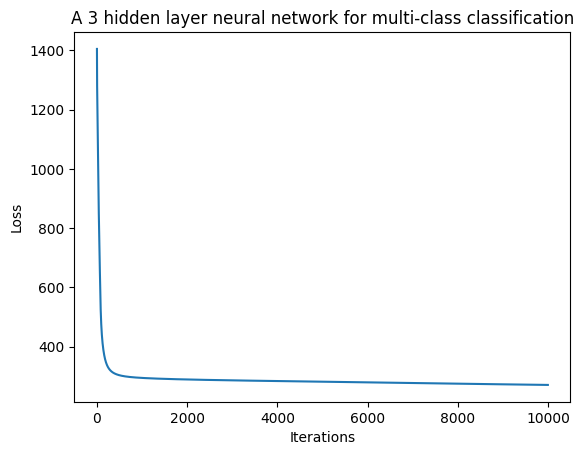

In [153]:
NN = NeuralNetwork()

err = []
# 3. TRAINING LOOP (X_train, Y_train_onehot)
for i in range(10000):
    NN.train(X_train, Y_train_onehot)
    err.append(-np.mean(np.sum(Y_train_onehot * np.log(NN.feedForward(X_train) + 1e-8))))

# Plot Loss
plt.plot(err)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("A 3 hidden layer neural network for multi-class classification")
plt.show()

Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91        47
           1       0.95      0.93      0.94        40
           2       0.92      0.97      0.94        35
           3       0.93      0.90      0.91        41
           4       0.77      0.81      0.79        37

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



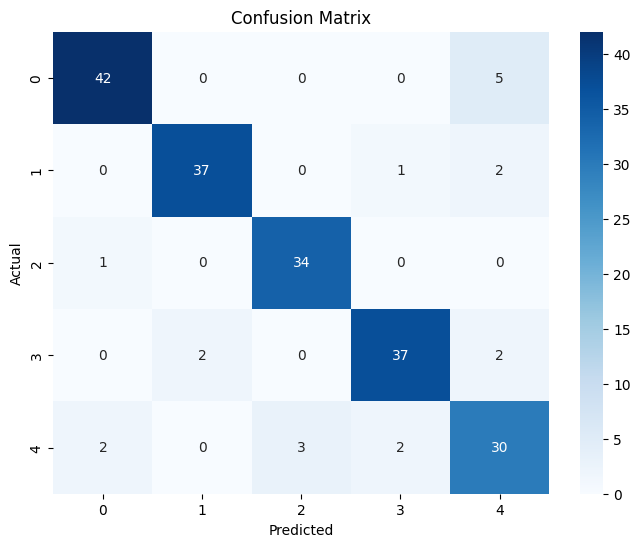

In [154]:
# 4. EVALUATION & METRICS (Added - Required by Assignment)
# Predict on Test Data
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

test_probs = NN.feedForward(X_test)
test_preds = np.argmax(test_probs, axis=1)

# Metrics
print("Accuracy:", accuracy_score(Y_test, test_preds))
print("\nClassification Report:\n", classification_report(Y_test, test_preds))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(Y_test, test_preds), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

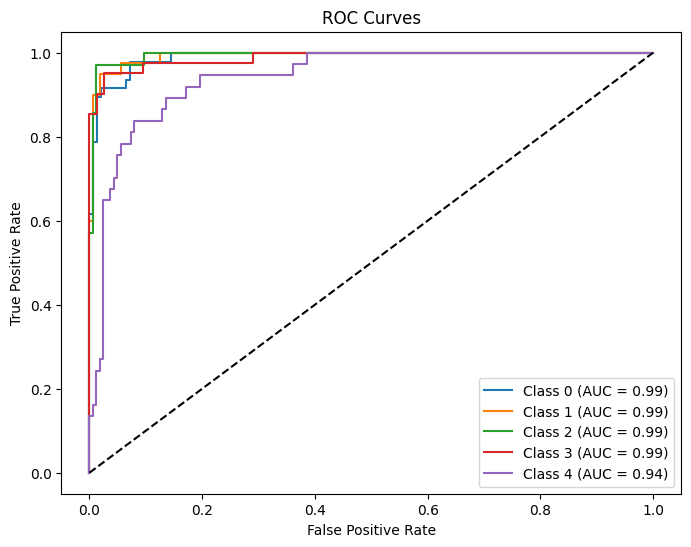

In [155]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

Y_true = Y_test.flatten()
num_classes = test_probs.shape[1]

Y_true_bin = label_binarize(Y_test, classes=np.arange(num_classes))

plt.figure(figsize=(8,6))

for cls in range(num_classes):
    fpr, tpr, thresholds = roc_curve(Y_true_bin[:, cls], test_probs[:, cls])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()


# Results with CHANGES

Learning Rate = 0.005<br>

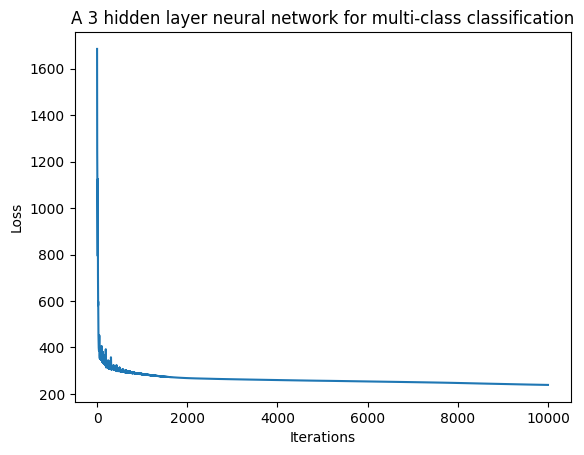

inputLayerNeurons = 2 <br>
hiddenLayer1_Neurons = 8 <br>
hiddenLayer2_Neurons = 16 <br>
hiddenLayer3_Neurons = 8 <br>
outputLayer_Neurons = 5 <br>

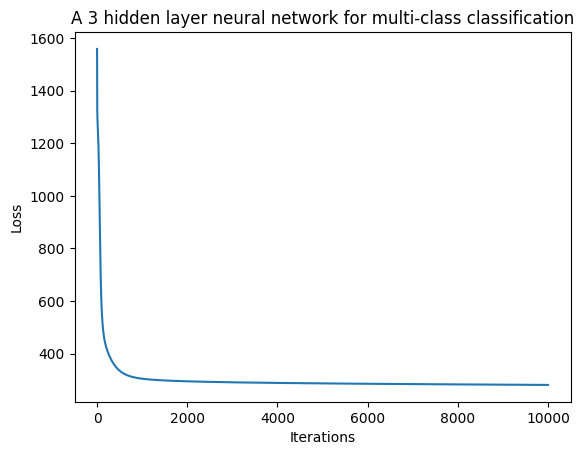

inputLayerNeurons = 2 <br>
hiddenLayer1_Neurons = 32 <br>
hiddenLayer2_Neurons = 16 <br>
hiddenLayer3_Neurons = 8 <br>
outputLayer_Neurons = 5 <br>

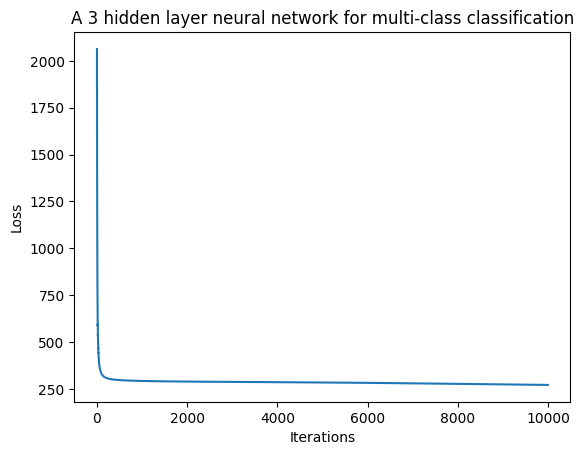